In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g555aW2r7S9jdyi_42vEx0-1_qPGtPzTS_Z6pbuK0LEkQmyAM-Nkl0


## Data

#### Ratings

Fixing the ratings dataset
- fixing the IDs
- removing the timestamp
- creating a train & test set
- test set: ratings >= 4 -> positive, else negative

In [ ]:
import pandas as pd

In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/main/ml-1m/ml_1m_csv/movielens_ratings.csv', header=None)
ratings.columns = ['user_id','movie_id','rating','timestamp']
# ratings = ratings.drop(columns=['timestamp'])
ratings.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
5,1,1197,3
6,1,1287,5
7,1,2804,5
8,1,594,4
9,1,919,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


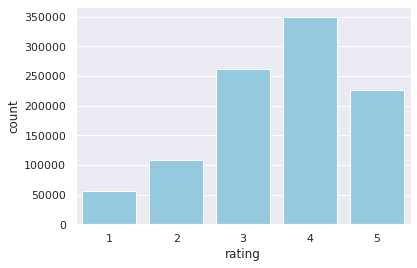

In [ ]:
import seaborn as sns
sns.set()

sns.countplot(ratings['rating'], color='skyblue')

In [ ]:
u_r, m_r = [], []
for i in range(len(ratings)):
  u_r.append('u' + str(ratings['user_id'][i]))
  m_r.append('m' + str(ratings['movie_id'][i]))
ratings['user_id'] = u_r
ratings['movie_id'] = m_r
ratings.head()
# ratings.to_csv("data/ratings_processed.csv", index=False)

,user_id,movie_id,rating
0,u1,m1193,5
1,u1,m661,3
2,u1,m914,3
3,u1,m3408,4
4,u1,m2355,5


In [ ]:
label = []
for i in range(len(ratings)):
    if ratings["rating"][i] > 2:
        label.append("positive")
    else:
        label.append("negative")
print(len(label))
label_3 = []
for i in range(len(ratings)):
    if ratings["rating"][i] > 3:
        label_3.append("positive")
    else:
        label_3.append("negative")
print(len(label_3))

1000209


In [ ]:
print(label.count("positive"))
print(label_3.count("positive"))

836478
575281


In [ ]:
ratings["label"] = label
ratings["label_3"] = label_3
ratings.head()

,user_id,movie_id,rating,label
0,u1,m1193,5,positive
1,u1,m661,3,negative
2,u1,m914,3,negative
3,u1,m3408,4,positive
4,u1,m2355,5,positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


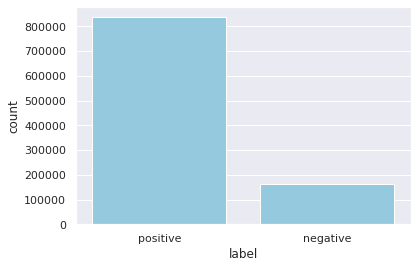

In [ ]:
sns.countplot(ratings['label'], color='skyblue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


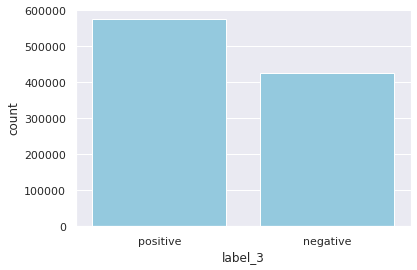

In [ ]:
sns.countplot(ratings['label_3'], color='skyblue')

In [ ]:
from sklearn.model_selection import train_test_split

ratings_train_set, ratings_test_set = train_test_split(ratings, test_size=0.25)
print("training set length: ", len(ratings_train_set))
print("test set length: ", len(ratings_test_set))
print("total length: ", len(ratings_train_set) + len(ratings_test_set))

training set length:  750156
test set length:  250053
total length:  1000209


In [ ]:
ratings_train_set = ratings_train_set.reset_index(drop=True)
ratings_train_set.head()

,user_id,movie_id,rating,label,label_3
0,u5667,m515,3,positive,negative
1,u3576,m260,5,positive,positive
2,u199,m204,3,positive,negative
3,u4473,m599,2,negative,negative
4,u2097,m3638,3,positive,negative


In [ ]:
ratings_test_set = ratings_test_set.reset_index(drop=True)
ratings_test_set.head()

,user_id,movie_id,rating,label,label_3
0,u2225,m3363,4,positive,positive
1,u692,m2792,3,positive,negative
2,u4411,m3471,5,positive,positive
3,u2144,m2338,3,positive,negative
4,u5327,m2413,1,negative,negative


In [ ]:
users_in_training = set(ratings_train_set["user_id"])
print("users_in_training: ", len(users_in_training))
users_for_testing = set(ratings_test_set["user_id"])
print("users_for_testing: ", len(users_for_testing))
users_test_excl = users_for_testing.difference(users_in_training)
print("users_test_excl (cold start): ", len(users_test_excl))

users_in_training:  6040
users_for_testing:  6039
users_test_excl (cold start):  0


In [ ]:
# ratings_train_set.to_csv("/content/drive/MyDrive/final/ratings/ratings_train_set.csv", index=False)
# ratings_test_set.to_csv("/content/drive/MyDrive/final/ratings/ratings_test_set.csv", index=False)

In [ ]:
ratings_train_set = pd.read_csv("/content/drive/MyDrive/final/ratings/ratings_train_set.csv")
ratings_test_set= pd.read_csv("/content/drive/MyDrive/final/ratings/ratings_test_set.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


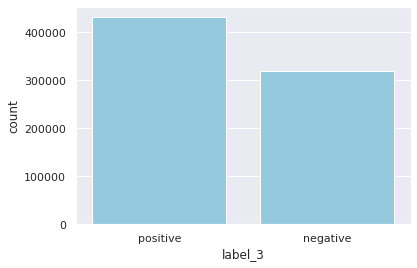

In [ ]:
sns.countplot(ratings_train_set['label_3'], color='skyblue', order=['positive','negative'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


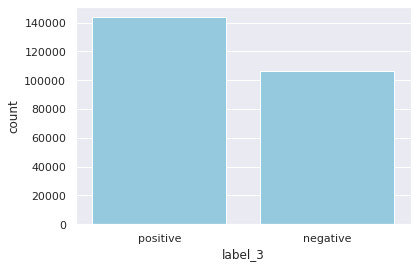

In [ ]:
sns.countplot(ratings_test_set['label_3'], color='skyblue')

In [ ]:
total_users = len(set(ratings["user_id"]))
print("Total number of users: ", total_users)
total_movies = len(set(ratings["movie_id"]))
print("Total number of movies: ", total_movies)
users_in_training = len(set(ratings_train_set["user_id"]))
print("Number of users in training set:",users_in_training)
movies_in_training = len(set(ratings_train_set["movie_id"]))
print("Number of movies in training set:", movies_in_training)
users_for_testing = len(set(ratings_test_set["user_id"]))
print("Number of users in test set:", users_for_testing)
movies_for_testing = len(set(ratings_test_set["movie_id"]))
print("Number of movies in test set:", movies_for_testing)

Total number of users:  6040
Total number of movies:  3706
Number of users in training set: 6040
Number of movies in training set: 3668
Number of users in test set: 6039
Number of movies in test set: 3501


In [ ]:
viz_df = pd.DataFrame([[6040, total_users, users_in_training, users_for_testing],[3883, total_movies, movies_in_training, movies_for_testing]],columns=['data available', 'involved in rating', 'training', 'testing'])
viz_df

,data available,involved in rating,training,testing
0,6040,6040,6040,6039
1,3883,3706,3668,3501


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(viz_df['data available'])
b_heights, b_bins = np.histogram(viz_df['involved in rating'])
# c_heights, c_bins = np.histogram(viz_df['training'], bins=a_bins)
# d_heights, d_bins = np.histogram(viz_df['testing'], bins=a_bins)

# width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')
# ax.bar(c_bins[:-1]+width, b_heights, width=width, facecolor='red')
# ax.bar(d_bins[:-1]+width, b_heights, width=width, facecolor='yellow')

In [ ]:
a_bins

array([3883. , 4098.7, 4314.4, 4530.1, 4745.8, 4961.5, 5177.2, 5392.9,
       5608.6, 5824.3, 6040. ])

#### Users

Fixing the users dataset
- fixing the IDs
- changing gender to a switch
- one hot encoding occupation
- changing the age groups
- cleaning zipcodes and creating zip zones

In [ ]:
users = pd.read_csv("/content/drive/MyDrive/main/ml-1m/ml_1m_csv/movielens_users.csv", header=None)
users.columns = ['user_id','gender','age_group','occupation','zip']
users.head()

,user_id,gender,age_group,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455


In [ ]:
# user id
u = []
for i in range(len(users)):
  u.append('u' + str(users['user_id'][i]))
users['user_id'] = u
users.head()

,user_id,gender,age_group,occupation,zip
0,u1,F,1,10,48067
1,u2,M,56,16,70072
2,u3,M,25,15,55117
3,u4,M,45,7,2460
4,u5,M,25,20,55455


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


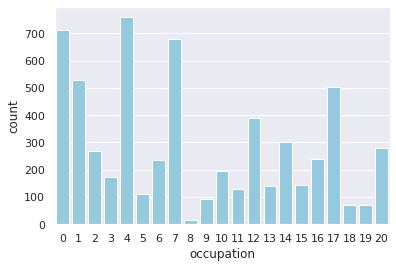

In [ ]:
sns.countplot(users['occupation'], color='skyblue')

In [ ]:
# # gender
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# gender = LabelEncoder().fit_transform(users["gender"])
# gender = OneHotEncoder().fit_transform(gender.reshape(-1, 1)).toarray()
# # users = users.drop(columns="gender")
# users["F"] = gender[:,0].astype(int)
# users["M"] = gender[:,1].astype(int)
users["gender_switch"]=gender[:,1].astype(int)
# users.head()

In [ ]:
# occupation

occu = LabelEncoder().fit_transform(users['occupation'])
occu = OneHotEncoder().fit_transform(occu.reshape(-1, 1)).toarray()
occu_str = []
for i in range(len(occu)):
  occu_str.append(list(occu[i].astype(int)))
# users = users.drop(columns="occupation")
users["occupation_one_hot"] = occu_str
users.head()

,user_id,gender,age_group,occupation,zip,F,M,gender_switch,occupation_one_hot
0,u1,F,1,10,48067,1,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,u2,M,56,16,70072,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,u3,M,25,15,55117,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,u4,M,45,7,2460,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,u5,M,25,20,55455,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
# age group

for i in range(len(users)):
    if users["age_group"][i]==56:
        users["age_group"][i]=6
    else:
        users["age_group"][i] = users["age_group"][i]//10

age_grp = LabelEncoder().fit_transform(users['age_group'])
age_grp = OneHotEncoder().fit_transform(age_grp.reshape(-1, 1)).toarray()
age_grp_str = []
for i in range(len(age_grp)):
    age_grp_str.append(str(age_grp[i].astype(int)).lstrip("[").rstrip("]"))

# users = users.drop(columns="age_group")
users["age_group_one_hot"] = age_grp_str

users.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,user_id,gender,age_group,occupation,zip,F,M,gender_switch,occupation_one_hot,age_group_one_hot
0,u1,F,0,10,48067,1,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1 0 0 0 0 0 0
1,u2,M,6,16,70072,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 0 0 0 0 1
2,u3,M,2,15,55117,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 1 0 0 0 0
3,u4,M,4,7,2460,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0 0 0 0 1 0 0
4,u5,M,2,20,55455,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 1 0 0 0 0


In [ ]:
# zip

from statistics import median
import numpy as np

for i in range(len(users)):
  zip = str(users['zip'][i])
  if len(zip)>5:
    zip = list(zip.split('-'))[0]
  users['zip'][i] = int(zip)

# handle zip outliers - assign median

median = int(median(users["zip"]))
for i in range(len(users)):
  zip = str(users['zip'][i])
  if len(zip)>5:
    users["zip"][i] = median
#     print(users["user_id"][i], end=" ")
#     print(users["zip"][i])

# zip zones
zip = np.array(users["zip"])
zip = zip//5000
users["zip_zones"] = zip
users = users.drop(columns="zip")

zip_zn = LabelEncoder().fit_transform(users['zip_zones'])
zip_zn = OneHotEncoder().fit_transform(zip_zn.reshape(-1, 1)).toarray()
zip_zn_str = []
for i in range(len(zip_zn)):
    zip_zn_str.append(str(zip_zn[i].astype(int)).lstrip("[").rstrip("]"))

# users = users.drop(columns="zip_zones")
users["zip_zones_one_hot"] = zip_zn_str

users.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,user_id,gender,age_group,occupation,F,M,gender_switch,occupation_one_hot,age_group_one_hot,zip_zones,zip_zones_one_hot
0,u1,F,0,10,1,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1 0 0 0 0 0 0,9,0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
1,u2,M,6,16,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 0 0 0 0 1,14,0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
2,u3,M,2,15,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 1 0 0 0 0,11,0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
3,u4,M,4,7,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0 0 0 0 1 0 0,0,1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
4,u5,M,2,20,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 1 0 0 0 0,11,0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0


In [ ]:
# users.to_csv("/content/drive/MyDrive/final/users/users_processed.csv", index=False)

In [ ]:
users_processed = pd.read_csv("/content/drive/MyDrive/final/users/users_processed.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


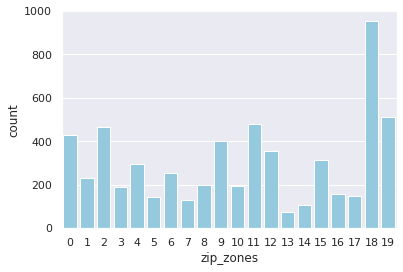

In [ ]:
sns.countplot(users_processed['zip_zones'], color='skyblue')

#### Movies

fixing the movies dataset
- fixing the IDs
- separating the title and year
- creating genre binary feature vectors

In [ ]:
movies = pd.read_csv("/content/drive/MyDrive/main/ml-1m/ml_1m_csv/movielens_movies.csv", encoding='ISO-8859-1')
movies.head()

,id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# movie_id
# movies = movies.rename(columns={'id':'movie_id'})
m = []
for i in range(len(movies)):
  m.append('m' + str(movies['movie_id'][i]))
movies['movie_id'] = m
movies.head()

,movie_id,title,genre
0,m1,Toy Story (1995),Animation|Children's|Comedy
1,m2,Jumanji (1995),Adventure|Children's|Fantasy
2,m3,Grumpier Old Men (1995),Comedy|Romance
3,m4,Waiting to Exhale (1995),Comedy|Drama
4,m5,Father of the Bride Part II (1995),Comedy


In [ ]:
#title
titles = []
years = []
for i in range(len(movies)):
  t = movies["title"][i].rstrip()
  title = t[:-7]
  year = t[-5:-1]
  titles.append(title)
  years.append(year)
movies = movies.drop("title", axis=1)
movies["title"] = titles
movies["year"] = years
movies.head()

,movie_id,genre,title,year
0,m1,Animation|Children's|Comedy,Toy Story,1995
1,m2,Adventure|Children's|Fantasy,Jumanji,1995
2,m3,Comedy|Romance,Grumpier Old Men,1995
3,m4,Comedy|Drama,Waiting to Exhale,1995
4,m5,Comedy,Father of the Bride Part II,1995


In [ ]:
#genre

MOVIE_GENRES = ['Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

gen_bins = []
for i in range(len(movies)):
  bin = ['0' for _ in range(18)]
  genres = list(movies['genre'][i].split('|'))
  for j in genres:
    bin[MOVIE_GENRES.index(j)]='1'
  gen_bins.append(' '.join(bin))

movies = movies.drop('genre',axis=1)
movies["genre"] = gen_bins
movies.head()

,movie_id,title,year,genre
0,m1,Toy Story,1995,0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
1,m2,Jumanji,1995,0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
2,m3,Grumpier Old Men,1995,0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
3,m4,Waiting to Exhale,1995,0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
4,m5,Father of the Bride Part II,1995,0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0


In [ ]:
# movies.to_csv("/content/drive/MyDrive/final/movies/movies_processed.csv", index=False)

In [ ]:
movies_processed = pd.read_csv("/content/drive/MyDrive/final/movies/movies_processed.csv")

In [ ]:
ls = list(movies["genre"])
ls_split = []
for i in ls:
  g = i.split('|')
  ls_split.extend(g)
len(ls_split)

6408

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


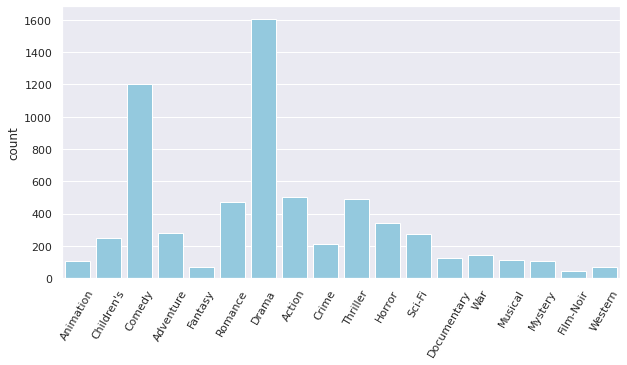

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
labels = ["Animation", "Children's", "Comedy", "Adventure", "Fantasy", "Romance","Drama", "Action",
          "Crime", "Thriller","Horror","Sci-Fi","Documentary","War","Musical","Mystery","Film-Noir","Western"]
p = sns.countplot(ls_split, color="skyblue", ax=ax)

p.set_xticklabels(labels=labels, rotation=60)
plt.show()

#### Movie Data Augmentation

In [ ]:
movies_full = pd.read_csv("/content/drive/MyDrive/main/movie_aug_data/movies_feature_vectors.csv")

## Graph

In [ ]:
ratings_train_set = pd.read_csv("/content/drive/MyDrive/final/ratings/ratings_train_set.csv")
ratings_train_set.head(3)

,user_id,movie_id,rating,label,label_3
0,u5667,m515,3,positive,negative
1,u3576,m260,5,positive,positive
2,u199,m204,3,positive,negative


In [ ]:
edge_list = []
U = []
M = []
for i in range(len(ratings_train_set)):
  U.append(ratings_train_set["user_id"][i])
  M.append(ratings_train_set["movie_id"][i])
  edge = (ratings_train_set['user_id'][i], ratings_train_set['movie_id'][i], ratings_train_set['rating'][i])
  edge_list.append(edge)
U = list(set(U))
M = list(set(M))
print("Number of users: ", len(U))
print("Number of movies: ", len(M))
print("Number of existing edges:",len(edge_list))

Number of users:  6040
Number of movies:  3668
Number of existing edges: 750156


In [ ]:
import networkx as nx
from networkx.algorithms import bipartite

g = nx.Graph()
g.add_nodes_from(U,bipartite=0)
g.add_nodes_from(M,bipartite=1)
g.add_weighted_edges_from(edge_list, weight='rating')
print("Number of nodes:", g.number_of_nodes())
print("Number of edges:", g.number_of_edges())

Number of nodes: 9708
Number of edges: 750156


## User Similarity

In [ ]:
users_in_training = list(set(ratings_train_set["user_id"]))
print(len(users_in_training))
movies_for_training = list(set(ratings_train_set["movie_id"]))
print(len(movies_for_training))

6040
3668


#### CN-based topological metrics

In [ ]:
from math import sqrt, log

def common_neighbors(g,u,v):
    u_nbr = set(g.neighbors(u))
    v_nbr = set(g.neighbors(v))
    return len(u_nbr.intersection(v_nbr))

def jaccard_coefficient(g,u,v):
	u_nbr = set(g.neighbors(u))
	v_nbr = set(g.neighbors(v))
	return len(u_nbr.intersection(v_nbr))/len(u_nbr.union(v_nbr))

def sorensen_index(g,u,v):
	u_nbr = set(g.neighbors(u))
	v_nbr = set(g.neighbors(v))
	return len(u_nbr.intersection(v_nbr))/(len(u_nbr)+len(v_nbr))

def leicht_holme_nerman(g,u,v):
	u_nbr = set(g.neighbors(u))
	v_nbr = set(g.neighbors(v))
	return len(u_nbr.intersection(v_nbr))/(len(u_nbr)*len(v_nbr))

def salton_cosine_similarity(g,u,v):
    u_nbr = set(g.neighbors(u))
    v_nbr = set(g.neighbors(v))
    return len(u_nbr.intersection(v_nbr))/sqrt(len(u_nbr)*len(v_nbr))

def hub_promoted_index(g,u,v):
    u_nbr = set(g.neighbors(u))
    v_nbr = set(g.neighbors(v))
    return len(u_nbr.intersection(v_nbr))/min(len(u_nbr),len(v_nbr))

def hub_depressed_index(g,u,v):
    u_nbr = set(g.neighbors(u))
    v_nbr = set(g.neighbors(v))
    return len(u_nbr.intersection(v_nbr))/max(len(u_nbr),len(v_nbr))

# def preferential_attachment(g,u,v):
#     u_nbr = set(g.neighbors(u))
#     v_nbr = set(g.neighbors(v))
#     return len(u_nbr)*len(v_nbr)

def resource_allocation(g,u,v):
    u_nbr = set(g.neighbors(u))
    v_nbr = set(g.neighbors(v))
    cn = u_nbr.intersection(v_nbr)
    ra = 0
    for i in cn:
        ra += 1/float(len(set(g.neighbors(i))))
    return ra

def adamic_adar(g,u,v):
    u_nbr = set(g.neighbors(u))
    v_nbr = set(g.neighbors(v))
    cn = u_nbr.intersection(v_nbr)
    aa = 0
    for i in cn:
        aa += 1/log(len(set(g.neighbors(i))))
    return aa

#### Movie, Rating and Genre Similarities


In [ ]:
from scipy import spatial
import numpy as np

def common_movie_rating_similarity(g,u,v): 
  u_nbr = set(g.neighbors(u))
  v_nbr = set(g.neighbors(v))
  common_movies = u_nbr.intersection(v_nbr)
  if len(common_movies)==0:
    return 0
  # print("common_movies:", common_movies)
  u_rating = [g[u][m]['rating'] for m in common_movies]
  # print(u_rating)
  v_rating = [g[v][m]['rating'] for m in common_movies]
  # print(v_rating)
  result = 1 - spatial.distance.cosine(u_rating, v_rating)
  return result

In [ ]:
similarity = common_movie_rating_similarity(g,'u697','u5232')
print(similarity)

0.9364628147891026


In [ ]:
# import warnings
# warnings.filterwarnings("ignore")

# user_genre = pd.DataFrame(columns=['user_id','genre_overview'])
# user_genre['user_id'] = U
# for i in range(len(user_genre)):
#    u_nbr = g.neighbors(user_genre['user_id'][i])
#    u_genre = np.zeros(18, dtype=int)
#    if i%500==0:
#      print("{}/{}".format(i,len(U)))
#    for m in u_nbr:
#      genre_str = list(map(int, movies.loc[movies['id']==m]['genre'].to_string().split()))[1:] 
#      # print(genre_str)
#      genre_bin = np.array(genre_str)
#      # print("m:", genre_bin)
#      u_genre = np.add(u_genre, genre_bin)
  
#    # normalize
#    u_genre = u_genre/float(sum(u_genre))
#    u_genre_rounded = [round(x,5) for x in u_genre]
#    user_genre['genre_overview'][i] = u_genre_rounded
#    # break
# user_genre.head()

In [ ]:
# user_genre.to_csv("drive/My Drive/main/ml-1m/user_genre_overview.csv")
user_genre = pd.read_csv("/content/drive/MyDrive/final/users/user_genre_overview.csv")

In [ ]:
print(len(user_genre))
user_genre.head(3)

6040


,user_id,genre_overview
0,u4165,"[0.03297, 0.0, 0.05495, 0.04396, 0.50549, 0.02..."
1,u4536,"[0.17857, 0.04762, 0.0119, 0.02381, 0.09524, 0..."
2,u3009,"[0.2381, 0.06349, 0.0, 0.0, 0.1746, 0.07937, 0..."


In [ ]:
MOVIE_GENRES = ['Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
def genre_similarity(u,v):
  u_genre = user_genre.loc[user_genre['user_id']==u]
  if len(u_genre)>0:   
    u_g = u_genre.iloc[0]['genre_overview']
  else:
    return 0
  v_genre = user_genre.loc[user_genre['user_id']==v]
  if len(v_genre)>0:
    v_g = v_genre.iloc  [0]['genre_overview']
  else:
    return 0
  if type(u_g) is str:
    u_g = list(map(float, u_g.lstrip("[").rstrip("]").split(',')))
    u_g = np.array(u_g)
    # print(u_g)
  if type(v_g) is str:
    v_g = list(map(float, v_g.lstrip("[").rstrip("]").split(',')))
    v_g = np.array(v_g)
    # print(v_g)
  result = 1 - spatial.distance.cosine(u_g, v_g)
  return result

In [ ]:
genre_similarity('u697','u5232')

0.5674165814675588

#### User feature similarity

In [ ]:
users_refined = pd.read_csv("/content/drive/MyDrive/final/users/users_with_feature_vector.csv")
users_refined.head(3)

,user_id,age_group,gender_switch,zip_zones,occupation_one_hot,feature_vector
0,u1,0,0,9,0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0,"[0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,u2,6,1,14,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0,"[6, 1, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,u3,2,1,11,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0,"[2, 1, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
from scipy import spatial
import numpy as np
import ast
def user_feature_similarity(u,v):
  u_index = users_refined.index[users_refined['user_id'] == u].to_list()[0]
  u_feature = users_refined["feature_vector"][u_index]
  u_feature = ast.literal_eval(u_feature)
  v_index = users_refined.index[users_refined['user_id'] == v].to_list()[0]
  v_feature = users_refined["feature_vector"][v_index]
  v_feature = ast.literal_eval(v_feature)
  u_feature = np.array(u_feature)
  v_feature = np.array(v_feature)
  return (1 - spatial.distance.cosine(u_feature,v_feature))

In [ ]:
user_feature_similarity('u1','u5')

0.9701221217219766

#### User Similarity Calculation

In [ ]:
from itertools import combinations

U = list(combinations(users_in_training,2))

u_len = len(U)
step_size = u_len//5
u1 = pd.DataFrame(U[:step_size])
print('u1 ',len(u1))
u2 = pd.DataFrame(U[step_size:2*step_size])
print('u2 ',len(u2))
u3 = pd.DataFrame(U[2*step_size:3*step_size])
print('u3 ',len(u3))
u4 = pd.DataFrame(U[3*step_size:4*step_size])
print('u4 ',len(u4))
u5 = pd.DataFrame(U[4*step_size:])
print('u5 ',len(u5))
print(len(u1)+len(u2)+len(u3)+len(u4)+len(u5))
print(len(U))

u1  3647556
u2  3647556
u3  3647556
u4  3647556
u5  3647556
18237780
18237780


In [ ]:
u1.to_csv("/content/drive/MyDrive/main/ml-1m/user_group_colab.csv",index = False)
u2.to_csv("/content/drive/MyDrive/main/ml-1m/user_sneha_colab.csv",index = False) 
u3.to_csv("/content/drive/MyDrive/main/ml-1m/user_sneha_pycharm.csv",index = False)
u4.to_csv("/content/drive/MyDrive/main/ml-1m/user_sneha_old.csv",index = False)
u5.to_csv("/content/drive/MyDrive/main/ml-1m/user_srijeet_colab.csv",index = False)

In [ ]:
u1.head(2)

,0,1
0,u780,u1665
1,u780,u1950


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations

# u1 = u1.rename(columns={0:'node1',1:'node2'})
feature_columns = ["node1", "node2", "cmrs", "genre", "cn","aa","hpi", "jc", "ra", "si","lhn","scs","hdi","user_feature_sim"]
# user_user_links = pd.DataFrame(columns=feature_columns) 
user_user_links_dict = []
count = 0
for i in range(len(u1)):
    u, v = u1['node1'][i],u1['node2'][i]
    if count%10000 == 0:
      print("Done with {} node-pairs".format(count))
    entry = {}
    entry["node1"] = u
    entry["node2"] = v
    entry["user_feature_sim"] = user_feature_similarity(u,v)
    entry["cn"] = common_neighbors(g,u,v)   
    entry["jc"] = jaccard_coefficient(g,u,v)
    
    # if jc>0.20:
    entry["genre"] = genre_similarity(u,v)
      # if genre > 0.90:
    entry["cmrs"] = common_movie_rating_similarity(g,u,v)
        # if cmrs > 0.90:                         
    entry["aa"] = adamic_adar(g,u,v)
    entry["hpi"] = hub_promoted_index(g,u,v)
    entry["ra"] = resource_allocation(g,u,v)
    entry["si"] = sorensen_index(g,u,v)
    entry["lhn"] = leicht_holme_nerman(g,u,v)
    entry["scs"] = salton_cosine_similarity(g,u,v)       
    entry["hdi"] = hub_depressed_index(g,u,v)
    
    user_user_links_dict.append(entry)

          # user_user_links = user_user_links.append(pd.Series([u,v,cmrs,genre,cn,aa,hpi,jc,ra,si,lhn,scs,hdi], index=feature_columns),  ignore_index=True)         
    count+=1
    # break
user_user_links = pd.DataFrame.from_dict(user_user_links_dict)
user_user_links.head()

In [ ]:
user_user_links.to_csv("/content/drive/MyDrive/final/users/user_user_links_part1.csv", index = False)

## Movie Similarity

In [ ]:
movies = pd.read_csv("/content/drive/MyDrive/final/movies/movies_full.csv")

In [ ]:
print(len(movies))
movies.head()

3883


,id,title,year,imdb_id,feature_vector
0,m1,Toy Story,1995,tt0114709,"[0.9382716049382716, 0, 0, 1, 1, 1, 0, 0, 0, 0..."
1,m2,Jumanji,1995,tt0113497,"[0.9382716049382716, 0, 1, 0, 1, 0, 0, 0, 0, 1..."
2,m3,Grumpier Old Men,1995,tt0113228,"[0.9382716049382716, 0, 0, 0, 0, 1, 0, 0, 0, 0..."
3,m4,Waiting to Exhale,1995,tt0114885,"[0.9382716049382716, 0, 0, 0, 0, 1, 0, 0, 1, 0..."
4,m5,Father of the Bride Part II,1995,tt0113041,"[0.9382716049382716, 0, 0, 0, 0, 1, 0, 0, 0, 0..."


In [ ]:
from scipy import spatial
import numpy as np
import ast
def movie_feature_similarity(m,n):
  m_index = movies.index[movies['id'] == m].to_list()[0]
  m_feature = ast.literal_eval(movies["feature_vector"][m_index])
  n_index = movies.index[movies['id'] == n].to_list()[0]
  n_feature = ast.literal_eval(movies["feature_vector"][n_index])
  m_feature = np.array(m_feature)
  n_feature = np.array(n_feature)
  return (1 - spatial.distance.cosine(m_feature,n_feature))

In [ ]:
movie_feature_similarity('m1','m3')

0.724263895249819

In [ ]:
ratings_train_set = pd.read_csv("/content/drive/MyDrive/final/ratings/ratings_train_set.csv")
movies_for_training = list(set(ratings_train_set["movie_id"]))
print(len(movies_for_training))

In [ ]:
MOVIE_IDS = list(movies["id"])
print(len(MOVIE_IDS))
MOVIE_IDS[:10]

3883


['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10']

In [ ]:
from heapq import nlargest
import itertools
count = 0
num = 10
movie_similarity = []
for i in range(len(movies)):
  m = movies["id"][i]
  similar_movies = {}
  for n in movies_for_training:
    if m==n:
      continue
    else:
      sim = movie_feature_similarity(m,n)
      similar_movies[n]=sim
  
  top_n = nlargest(num, similar_movies, key = similar_movies.get)
  movie_similarity.append([m,top_n])
  count +=1
  if count%100==0:
    print("Done with", count, "movies")

movies_top_10_similar = pd.DataFrame(movie_similarity, columns=["movie_id","top_10_movies"])
movies_top_10_similar.to_csv("/content/drive/MyDrive/final/movies/training_set_top_10_similar_movies.csv",index=False)
print(len(movies_top_10_similar))
movies_top_10_similar.head()

Done with 100 movies
Done with 200 movies
Done with 300 movies
Done with 400 movies
Done with 500 movies
Done with 600 movies
Done with 700 movies
Done with 800 movies
Done with 900 movies
Done with 1000 movies
Done with 1100 movies
Done with 1200 movies
Done with 1300 movies
Done with 1400 movies
Done with 1500 movies
Done with 1600 movies
Done with 1700 movies
Done with 1800 movies
Done with 1900 movies
Done with 2000 movies
Done with 2100 movies
Done with 2200 movies
Done with 2300 movies
Done with 2400 movies
Done with 2500 movies
Done with 2600 movies
Done with 2700 movies
Done with 2800 movies
Done with 2900 movies
Done with 3000 movies
Done with 3100 movies
Done with 3200 movies
Done with 3300 movies
Done with 3400 movies
Done with 3500 movies
Done with 3600 movies
Done with 3700 movies
Done with 3800 movies
3883


,movie_id,top_10_movies
0,m1,"[m1064, m2355, m3114, m2354, m2142, m2141, m36..."
1,m2,"[m60, m2005, m2399, m1009, m2043, m1881, m1750..."
2,m3,"[m93, m237, m3046, m294, m295, m339, m39, m708..."
3,m4,"[m72, m322, m562, m45, m3477, m864, m1392, m14..."
4,m5,"[m52, m186, m38, m203, m585, m176, m1166, m156..."


In [ ]:
top_n = nlargest(5, d, key=d.get)
top_n

['m5', 'm3', 'm8', 'm4', 'm2']

In [ ]:
sorted(d, key=d.get, reverse=True)[:5]

['m5', 'm3', 'm8', 'm4', 'm2']